<a href="https://colab.research.google.com/github/python4phys1cs/physics-problems/blob/main/calculating-bandgap/calculating-bandgap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Calculating the bangap of material from transmittance data

Importing necessary libraries and modules

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from sklearn.metrics import mean_squared_error

Reading Transmittance data to a data frame using read_csv module

In [19]:
data = "https://raw.githubusercontent.com/python4phys1cs/physics-problems/main/calculating-bandgap/data/znse-data.csv"

df = pd.read_csv(data, sep=",")

Converting the Transmittance values from percentage to absolute values
$$ T= \frac {T\%}{100}$$

In [20]:
#T = T%/100
T = df["Transmittance"]/100

Converting Wavelength to meters\
**Conversion factor:** $ 1\ m = 10^{-9}\ nm $

In [21]:
wavelength = df['Wavelength']*1e-9

Calculating the energy associated with wavelength of light

In [22]:
h = 6.626e-34 #planck's constant
c = 3e8 #velocity of light
eV = 1.602e-19 # 1 electron-volt

Eg = h*c/(wavelength*eV)

Calculating molar absorption coefficient $ \alpha $

$$ \alpha = - \frac{ln(T)}{t} $$
where $ t $ is the thickness of sample

In [23]:
t = 2e-4 #thickness of sample in meter

alpha = - np.log(T)/t

Calculating $ (\alpha h \nu ) ^ {1/2} $


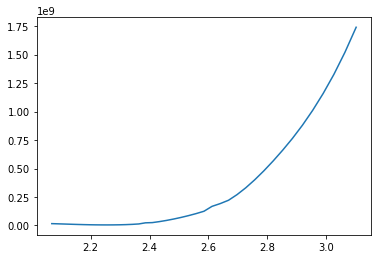

In [24]:
#setting power for direct or indirect semiconductor
n=2

#evaluating the values for Tauc Plot
TP = (alpha*Eg)**n

plt.plot(Eg,TP)
plt.show()

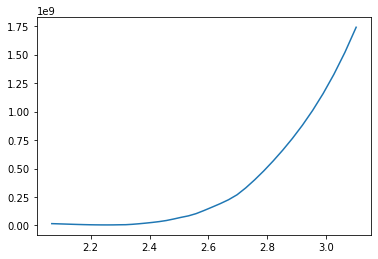

In [25]:
#smoothening the data using Savitzky-Golay Filter
sg = savgol_filter(TP, 9, 4)

plt.plot(Eg, sg)
plt.show()

In [26]:
#calculating the maximum value of Tauc plot for rescaling
sgmax = max(sg)

#rescaling the Tauc plot
sgre = sg/sgmax

In [27]:
#initiating arrays to store values
sgpred = []
slope = []
intercept = []

for i in range(len(Eg)):
    #calculating slope and intercept of line for every 10 points
    m, b = np.polyfit(Eg[i:i+10],sgre[i:i+10],1)
    slope.append(m)
    intercept.append(b)
    #calculating the predicted value from the line parameters
    sgpred.append(m*Eg[i]+b)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


In [28]:
rmse = []

#calculating the root mean square error between predicted and actual values
for i in range(len(sg)):
    mse = mean_squared_error(sgre, sgpred)
    rmse.append(mse**0.5)

In [29]:
selseg = []

#selecting only those segments for which rmse<0.75
for i in range(len(slope)):
    if(rmse[i]<0.75):
        selseg.append(slope[i])
    else:
        selseg.append(0)

In [30]:
#finding the maximum slope within the selected segments
max_slope = max(selseg)
#find the index for which slope is maximum
max_slope_index = selseg.index(max_slope)

In [31]:
#calculating the bandgap of material
bg = (max_slope*Eg[max_slope_index]-sgre[max_slope_index])/max_slope

print("The band gap of material is:", bg)

The band gap of material is: 2.662258198872986
